In [2]:
import numpy as np
import pandas as pd
import io
import os
import csv
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image
import pydotplus

In [3]:
from sklearn.tree import DecisionTreeClassifier
import nbformat
from nbconvert import PythonExporter


In [4]:
from sklearn.model_selection import train_test_split
import json


In [5]:
from sklearn import metrics
from flask import Flask, jsonify

import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

cred = credentials.Certificate("we-don-t-byte---ass-firebase-adminsdk-kdbj6-ec500ebd6d.json")
firebase_admin.initialize_app(cred)
db = firestore.client()


In [6]:
#def recommendTofile():

provinceJson =  '{ "Limpopo" : 1,"Gauteng" : 2,"Free State" : 3,"Western Cape" : 4,"KZN" : 5,"North West" : 6,"Northern Cape" : 7,"Eastern Cape" : 8,"Mpumalanga" : 9}'
categoryJson =  '{"Books" : 1, "Shoes" : 2, "Clothing" : 3, "Tech" : 4, "Kitchen" : 5}'

# parse x:
loadProvinceJ = json.loads(provinceJson)
loadCategoryJ = json.loads(categoryJson)

print('collection')
products_ref = db.collection('Products')
Products_docs = products_ref.get()

print('collected')
#for prod_doc in Products_docs:

        #print(f'{prod_doc.id} => {prod_doc.to_dict()}')
        #print(prod_doc.exists('clicks'))
       # city_ref = db.collection(u'Products').document(prod_doc.id)

       # city_ref.set({u'id': prod_doc.id}, merge=True)
      #  noOfClicks = 1
        #if prod_doc.get('clicks'):
        #    noOfClicks = prod_doc.get('clicks')
            
        
        #category = prod_doc.get('category')
       # print(prod_doc.id)
        #print(loadCategoryJ[category])
        #print(prod_doc.get('clicks'))
        #print(prod_doc.get('category'))


users_ref = db.collection('Users')
users_docs = users_ref.list_documents()
# the result is a Python dictionary:
#print(loadCategoryJ["age"])

for doc in users_docs:
    print(doc.id)
    province = ''
    userDoc1 = users_ref.document(doc.id)
    userColl1 = userDoc1.collection('info')
    userColl2 = userDoc1.collection('Wishlist')
    colDocs1 = userColl1.get()
    s = False
    colDocs2 = userColl2.list_documents()
    #
    # ##
    # Wishlist
    ####
    #
    for colD_doc in colDocs2:
        print(colD_doc.id)
        pid = '0OeiOnaPTn1AiJWTUQ9i'
        s = pid in colDocs2

        print("ProductID in Wishlist")
    #
    #    Province
    #

    for colD_doc in colDocs1:
        print(colD_doc.get('province'))
        province = colD_doc.get('province')

    products_ref = db.collection('Products')
    Products_docs = products_ref.get()

    for prod_doc in Products_docs:

        #print(f'{prod_doc.id} => {prod_doc.to_dict()}')
        #print(str(prod_doc.exists('clicks')))
        noOfClicks = 1
        #
        #   Clicks
        #
        if prod_doc.get('clicks')>= 1:
            noOfClicks = prod_doc.get('clicks')
            
        #
        #
        #  Product
        #
        category = prod_doc.get('category')
        print(loadCategoryJ[category])
        #print(prod_doc.get('clicks'))
        #print(prod_doc.get('category'))
        break

col_names = ['Prod_ID', 'Prod_Cat', 'User_ID', 'User_Province', 'Event', 'Clicks', 'Wishlist', 'Recommend']


collection
collected
1RvEwuC2eCdzoKyaATXC9pNsXwH3
0cHxbCxG7mY7xA7l1Dpn
ProductID in Wishlist
Mpumalanga
5
4FpqzoGZC7hQCGkM8np285ZkG213
01jWTF8NnJRanatcqWWA
ProductID in Wishlist
Mpumalanga
5
6dVmAh0hHaTHJ4JsDwAcvdKzOot1
North West
5
7Dhh6eQ4ZndbNaMjvotZ1LVLZmm2
0cCtsXbwGQqu7LoLIFmv
ProductID in Wishlist
Free State
5
8ybiH9PgXCf9V0jYfzzN9ZS9Kix1
0FrZIkNP98yWbVRuE1Wd
ProductID in Wishlist
Free State
5
C71zxN4ZjTQuIccCChEJAmhTj693
KwaZulu-Natal
5
KnowQWkxdehDmh44J75y2pB8NZy2
01jWTF8NnJRanatcqWWA
ProductID in Wishlist
Mpumalanga
5
MpLlKterWMRjBC7K2hiVkl0F10E3
North West
5
OOEJnPpEpmaWzCZB4NgzdRjpVOF2
5qe2CeO4TfZwtAF1T0Om
ProductID in Wishlist
North West
5
PffrBEZS4zaxW6RU9j0h7Aky4Zl2
3Y0LgxYEZGlkNbfTuxdl
ProductID in Wishlist
North West
5
Ph48QU368fXPZtfbhRhT16m6ez42
0cHxbCxG7mY7xA7l1Dpn
ProductID in Wishlist
Free State
5
QTV1u5rSOYeIMu3Rjv59y6EbfAS2
2suTIt6CxtXy6j7dnAaH
ProductID in Wishlist
KwaZulu-Natal
5
VLdYRQGphUSHnlv04MD5a1FIaBs1
Mpumalanga
5
YRHTjduMIZN61W9OPy8DJzCh3W92
Free State


In [7]:
pima = pd.read_csv("../assets/DecisionTreeData/Train_Data.csv", header=None, names=col_names)
pima

,Prod_ID,Prod_Cat,User_ID,User_Province,Event,Clicks,Wishlist,Recommend
0,Z6KITtqfEH9y9EnXRd57,5,hWB4qgFYtIfJABvjq3XfEsxiGVU2,1,wishlist,1,1,1
1,Z6KITtqfEH9y9EnXRd57,5,hWB4qgFYtIfJABvjq3XfEsxiGVU2,1,view,1,0,1
2,YMJqe9iK1fZCJJQn3WHV,2,EjT2OL7otRShSYDc2FBPooYekZC3,1,wishlist,2,1,1
3,YMJqe9iK1fZCJJQn3WHV,2,EjT2OL7otRShSYDc2FBPooYekZC3,1,view,2,0,1
4,YMJqe9iK1fZCJJQn3WHV,2,EjT2OL7otRShSYDc2FBPooYekZC3,1,view,2,0,0
...,...,...,...,...,...,...,...,...
557,03CUmWipKQZ73hF5be5b,3,HeSu08geVubHffYrUuuw2dbpmqx2,1,wishlist,6,1,1
558,03CUmWipKQZ73hF5be5b,3,HeSu08geVubHffYrUuuw2dbpmqx2,1,view,6,0,1
559,03CUmWipKQZ73hF5be5b,3,Cb0TFCwYZUUj5xJA43vG9W9LUbn1,3,wishlist,6,1,1
560,03CUmWipKQZ73hF5be5b,3,kQ0okpadrAURKYiYvXdqoiV7I2c2,4,view,6,0,1


In [8]:
#pimas.head()

In [9]:
feature_cols = ['Prod_Cat', 'User_Province', 'Clicks', 'Wishlist']

In [10]:
X = pima[feature_cols]

In [11]:
y = pima.Recommend

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Accuracy: 0.9112426035502958
|--- Wishlist <= 0.50
|   |--- User_Province <= 1.50
|   |   |--- Prod_Cat <= 2.50
|   |   |   |--- Prod_Cat <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Prod_Cat >  1.50
|   |   |   |   |--- Clicks <= 2.50
|   |   |   |   |   |--- Clicks <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Clicks >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Clicks >  2.50
|   |   |   |   |   |--- Clicks <= 4.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Clicks >  4.00
|   |   |   |   |   |   |--- Clicks <= 5.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Clicks >  5.50
|   |   |   |   |   |   |   |--- Clicks <= 9.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Clicks >  9.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |--- Prod_Cat >  2.50
|   |   |   |--- Clicks <= 3.50
|   |   |   |   |--- Prod_Cat <= 3.50
|   |   |   |   |   |--- C

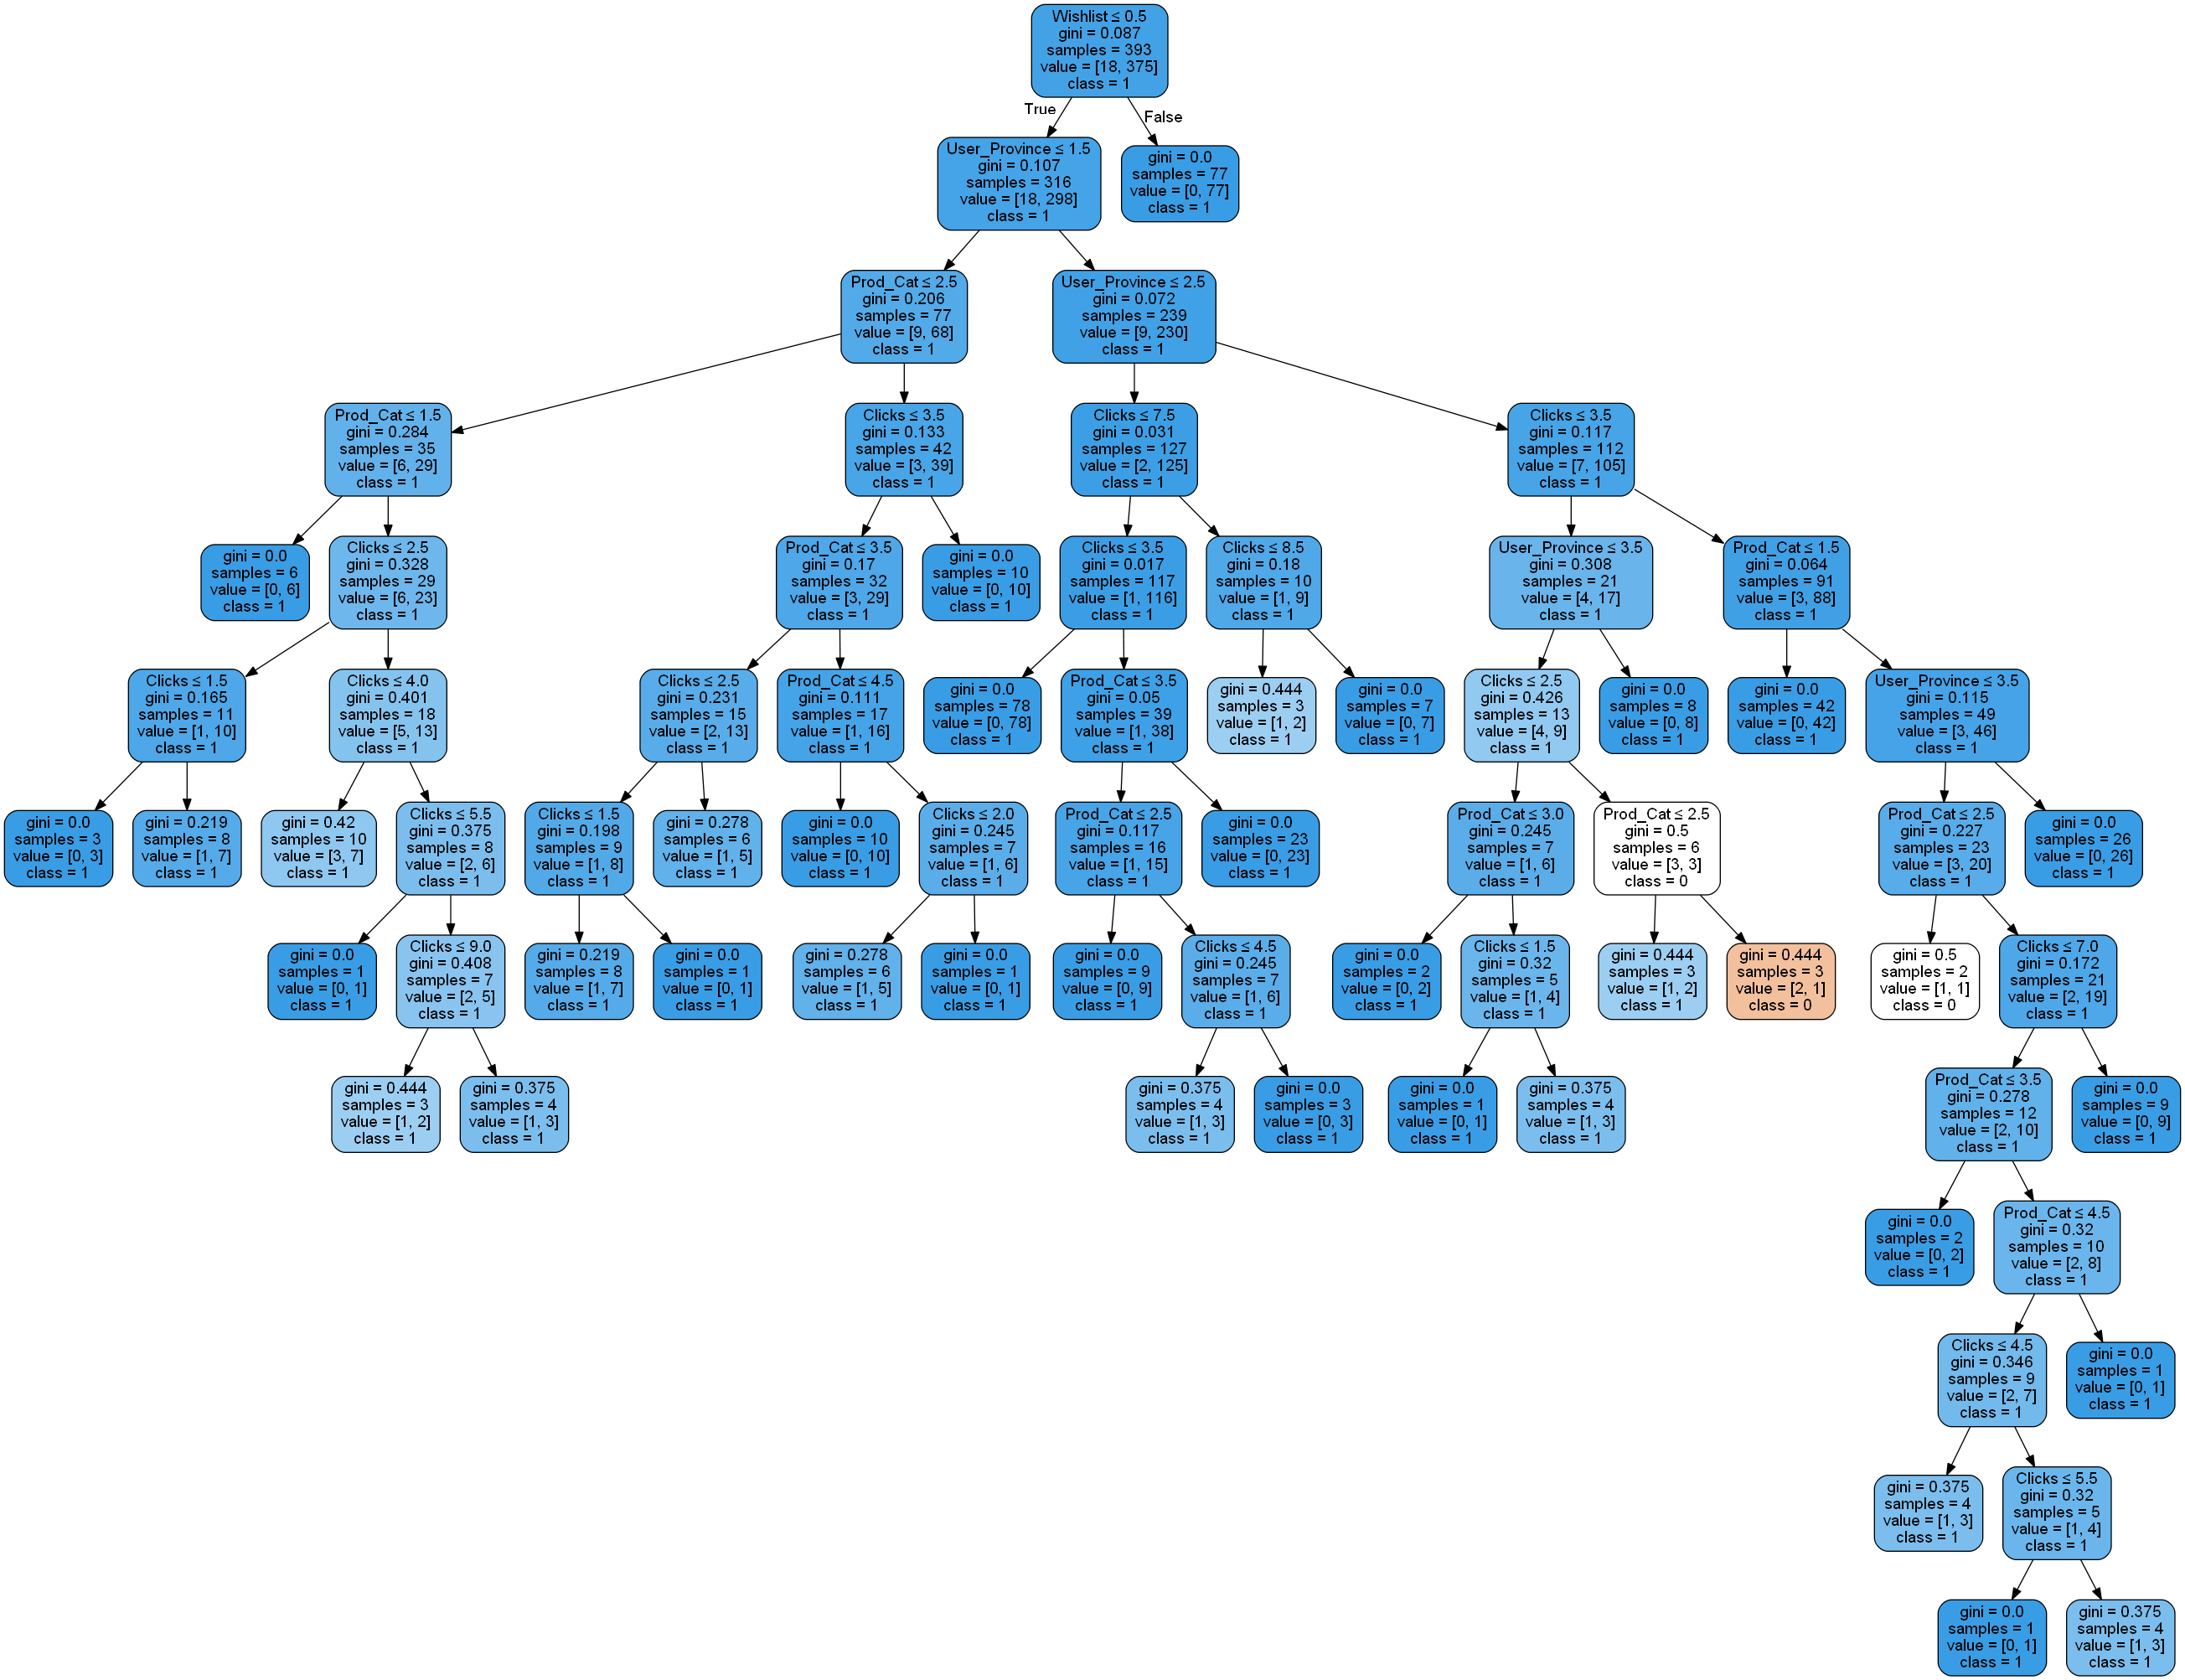

In [14]:
#Before Pruning
clf = DecisionTreeClassifier()

#pimas = pd.read_csv("..assets/DecisionTreeData/test_Data.csv", header=None, names=col_names)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=1) # 100% Test Data(Totally Different from Training Data/Duplicates filtered out)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

y_pred.tofile("../assets/DecisionTreeOutputs/recommendations.csv", sep = ',')

AccuracyBeforePruning = metrics.accuracy_score(y_test, y_pred)
print("-----------------------------------------------ACCURACY BEFORE PRUNING---------------------------------\n")

print(AccuracyBeforePruning)

print("\n-------------------------------------------------------------------------------------------------------\n")

r = export_text(clf, feature_names=feature_cols)

print(r)

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../assets/DecisionTreeOutputs/recommendations.png')
Image(graph.create_png())

Accuracy: 0.9408284023668639
|--- Wishlist <= 0.50
|   |--- User_Province <= 1.50
|   |   |--- Prod_Cat <= 2.50
|   |   |   |--- Prod_Cat <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Prod_Cat >  1.50
|   |   |   |   |--- Clicks <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Clicks >  2.50
|   |   |   |   |   |--- class: 1
|   |   |--- Prod_Cat >  2.50
|   |   |   |--- Clicks <= 3.50
|   |   |   |   |--- Prod_Cat <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Prod_Cat >  3.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Clicks >  3.50
|   |   |   |   |--- class: 1
|   |--- User_Province >  1.50
|   |   |--- User_Province <= 3.50
|   |   |   |--- User_Province <= 2.50
|   |   |   |   |--- Clicks <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Clicks >  3.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- User_Province >  2.50
|   |   |   |   |--- Clicks <= 28.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Clicks

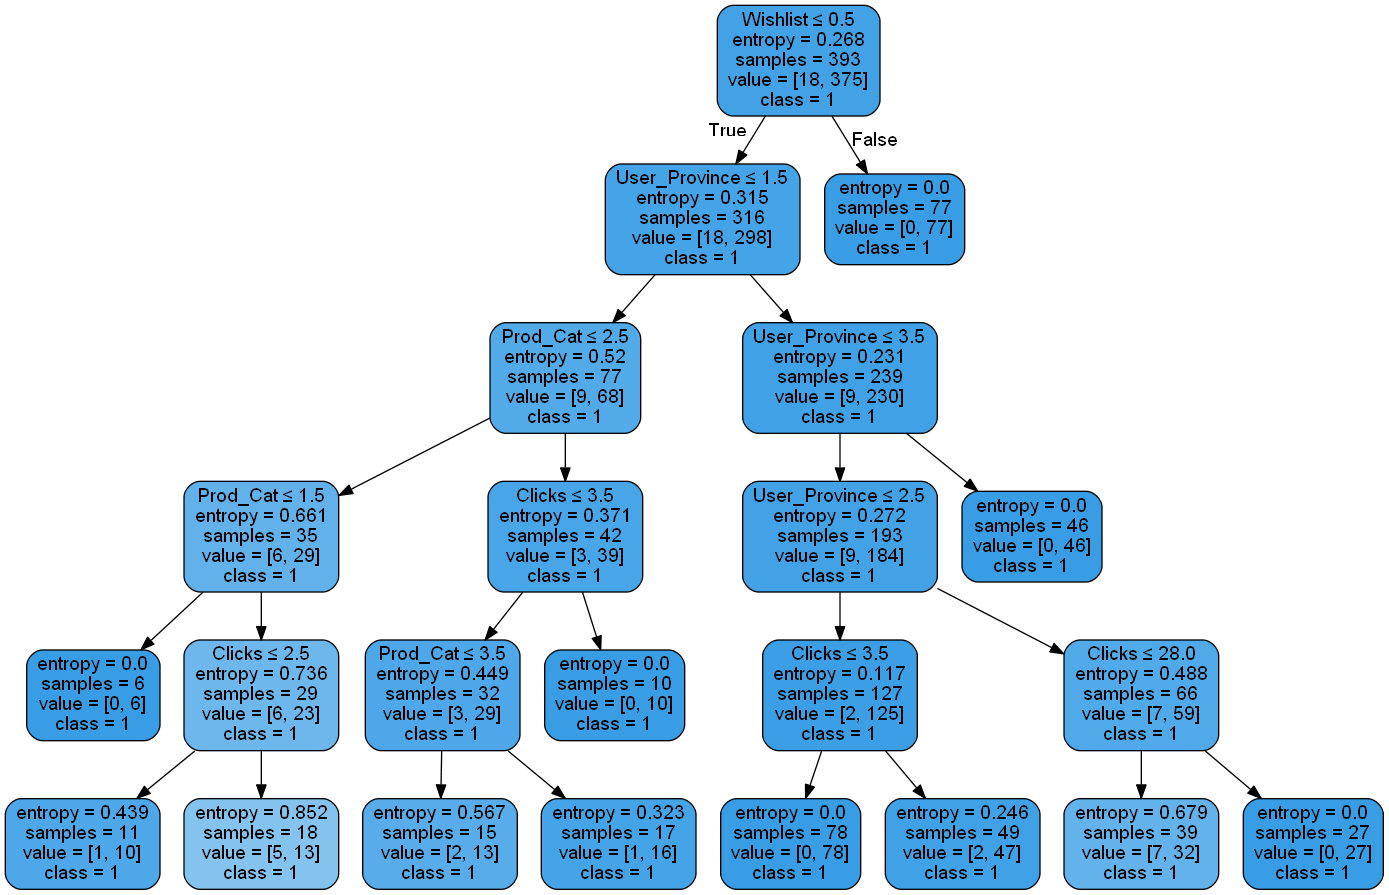

In [15]:
#After pruning 
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5) #Given a depth of 5 to make the tree less complicated(Avoid overfitting)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

y_pred.tofile("../assets/DecisionTreeOutputs/recommendations(Pruned).csv", sep = ',')

AccuracyAfterPruning = metrics.accuracy_score(y_test, y_pred)

print("-----------------------------------------------ACCURACY AFTER PRUNING-------------------------------\n")
print(AccuracyAfterPruning)
print("\n-------------------------------------------------------------------------------------------------------\n")

r = export_text(clf, feature_names=feature_cols)

print(r)

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../assets/DecisionTreeOutputs/recommendations(Pruned).png')
Image(graph.create_png())
